# CPS1.2 - Computer Problem Set 1.2
### **Simulation of the Brownian motion**

## Forward simulation of $\{W_{t_1^n},...,W_{t_n^n}\}$

In [141]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
T=1
n=5
W0 = 0
def delta_T(t,N):
    return t*2**(-N)

(a)

(b) Discretized Brownian motion

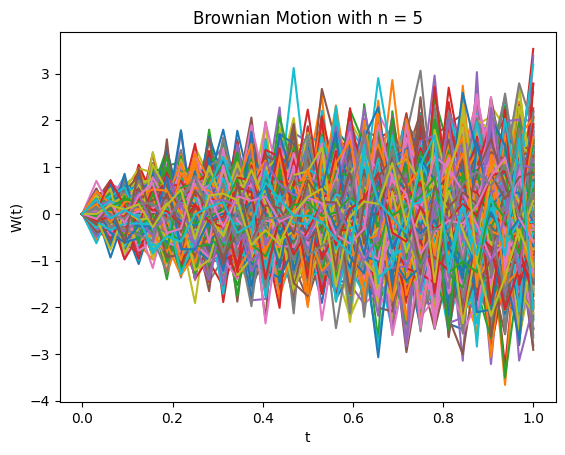

In [143]:
def W(t,N,i):
    if i==0:
        return W0
    else:
        Z = np.random.normal(0,1)
        return W(t,N,i-1) + Z*np.sqrt(delta_T(t,N))
    
def Simulation(T,n,number_simulation,plot=True):
    WT_list = []
    WT_on_2_list = []
    for i in range(number_simulation):
        Y = []
        for j in range(2**n+1):
            Y.append(W(T,n,j))
        WT_on_2_list.append(Y[n//2])
        WT_list.append(Y[-1])
        if plot:
            plt.plot(np.linspace(0,T,2**n+1),Y)
    if plot:
        plt.title('Brownian Motion with n = '+str(n))
        plt.xlabel('t')
        plt.ylabel('W(t)')
    return WT_list,WT_on_2_list

WT_list_1000,WT_on_2_list_1000 = Simulation(T,n,1000)
plt.show()

(c) Mean & Variance of $W_T$

With the previous simulation (n=50), we can see that the mean of $W_T$ is close to 0. The variance of $W_T$ is close to 0 too :
The covariance of $W_{T}$ and $W_{T/2}$ is close to $T/2$.

In [144]:
# With the previous simulation (n=50)
meanWT = np.mean(WT_list_1000)
varWT = np.var(WT_list_1000)
covariance = np.cov(WT_list_1000,WT_on_2_list_1000)[0][1]
print('Mean of W(T) is',meanWT)
print('Variance of W(T) is',varWT)
print('Covariance of W(T) and W(T/2) is',covariance)

Mean of W(T) is -0.0019295485039023657
Variance of W(T) is 0.961293915250108
Covariance of W(T) and W(T/2) is -0.0030833694981338804


Now let's plot the mean and variance of $W_T$ for different values of n :

<Figure size 1200x800 with 0 Axes>

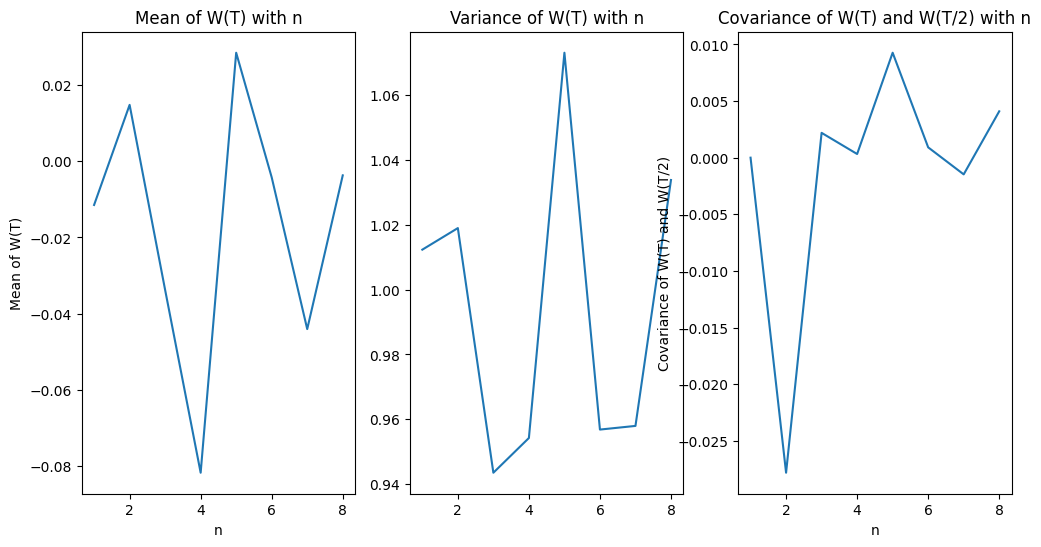

In [146]:
max_n = 8
meanWT_list = []
varWT_list = []
covariance_list = []


plt.figure(figsize=(12, 8))
for i in range (1,max_n+1):
    WT_list_out,WT_on_2_list_out = Simulation(T,i,1000,False)
    meanWT = np.mean(WT_list_out)
    varWT = np.var(WT_list_out)
    covariance = np.cov(WT_list_out,WT_on_2_list_out)[0][1]
    meanWT_list.append(meanWT)
    varWT_list.append(varWT)
    covariance_list.append(covariance)

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.plot(np.linspace(1,max_n,max_n),meanWT_list)
plt.title('Mean of W(T) with n')
plt.xlabel('n')
plt.ylabel('Mean of W(T)')

plt.subplot(1,3,2)
plt.plot(np.linspace(1,max_n,max_n),varWT_list)
plt.title('Variance of W(T) with n')

plt.subplot(1,3,3)
plt.plot(np.linspace(1,max_n,max_n),covariance_list)
plt.title('Covariance of W(T) and W(T/2) with n')
plt.xlabel('n')
plt.ylabel('Covariance of W(T) and W(T/2)')     

plt.show()

##### **Mean of $W_T$**

The mean of $W_T$ can be computed as follows:

$$E[W_T] = E[\frac{1}{2^n} \sum_{i=1}^{2^n} W_{t_i}] = \frac{1}{2^n} \sum_{i=1}^{2^n} E[W_{t_i}] = 0$$
Because Brownian motion has independent increments, the expectation (E) of their sum is the sum of their expectations.

It is coherent with the simulation; the limit of the mean is 0 when n tends to infinity.
***
##### **Variance of $W_T$**

The variance of $W_T$ can be computed as follows:

$$Var(W_T) = E[W_T^2] - E[W_T]^2 = E[W_T^2] = E[\frac{1}{2^n} \sum_{i=1}^{2^n} W_{t_i}^2] = \frac{1}{2^n} \sum_{i=1}^{2^n} E[W_{t_i}^2] = \frac{T}{2^n} \sum_{i=1}^{2^n} E[W_{t_i}^2] = T$$

It is coherent with the simulation; the limit of the variance is T ( =1 ) when n tends to infinity.
***


##### **Covariance between $W_T$ and $W_{T/2}$**

The covariance between W_T and W_T/2 can be computed as follows:

$$Cov(W_T, W_{T/2}) = E[W_T * W_{T/2}] - E[W_T] * E[W_{T/2}]$$

Since Brownian motion has independent increments, the expectation (E) of their product is the product of their expectations:

$$Cov(W_T, W_{T/2}) = E[W_T] * E[W_{T/2}] - E[W_T] * E[W_{T/2}] = 0$$
It is coherent with the simulation; the limit of the covariance is 0 when n tends to infinity.
***